## Análisis de Componentes Principales (PCA) para Reducción de Dimensionalidad en el Dataset de Calidad de Vino

### 1. Carga de Datos y Exploración

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset de Wine Quality
df = pd.read_csv('winequality-red.csv')

# Revisar información básica del dataset
print(df.info())
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Detectar valores atípicos
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

### 2. Preprocesamiento de Datos
#### Normalización de Variables

In [12]:
# Normalizar las variables para PCA (excepto calidad)
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(df.drop('quality', axis=1))

# Crear DataFrame con columnas correctas
columnas = df.drop('quality', axis=1).columns  # Excluir columna 'quality'
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas)


### 3. Aplicación de PCA
#### Reducción de Dimensionalidad

In [23]:
# Aplicar PCA para reducir dimensionalidad
pca = PCA(n_components=0.9)  # Capturar al menos el 90% de la variabilidad
pca_data = pca.fit_transform(df_normalizado)

#### Visualización de Variabilidad Explicada


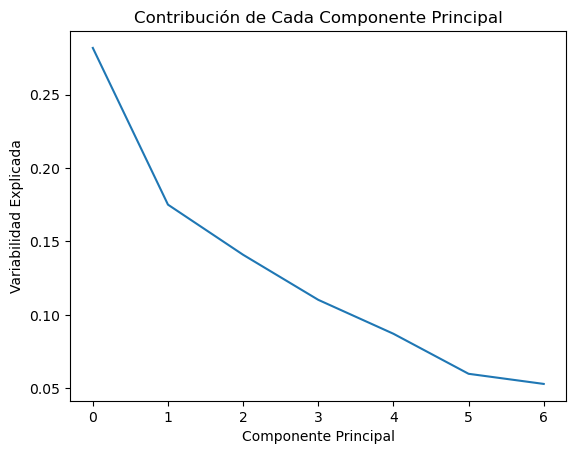

In [24]:
# Gráfico de variabilidad explicada por cada componente principal
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Variabilidad Explicada')
plt.title('Contribución de Cada Componente Principal')
plt.show()

### 4. Interpretación de Componentes Principales
#### Análisis de Coeficientes

In [19]:
# Analizar coeficientes de cada componente principal
print(pca.components_)

[[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
 [-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
   0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]
 [-0.22961737  0.07895978 -0.07941826 -0.37279256  0.66619476 -0.04353782
  -0.03457712 -0.17449976 -0.00378775  0.55087236 -0.12218109]
 [-0.08261366  0.21873452 -0.05857268  0.73214429  0.2465009  -0.15915198
  -0.22246456  0.15707671  0.26752977  0.22596222  0.35068141]
 [ 0.10147858  0.41144893  0.06959338  0.04915555  0.30433857 -0.01400021
   0.13630755 -0.3911523  -0.52211645 -0.38126343  0.36164504]
 [-0.35022736 -0.5337351   0.10549701  0.29066341  0.37041337 -0.11659611
  -0.09366237 -0.17048116 -0.02513762 -0.44746911 -0.3276509 ]]
